In [2]:
import tensorflow as tf
x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], name='x')
y = tf.constant([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], name='y')


In [3]:
c=tf.reduce_mean(x)

#c = tf.multiply(a, b)
sesss=tf.Session()
sesss.run(c)


3.5

In [4]:
d=tf.reduce_mean(y)
sesss.run(d)

7.0

In [5]:
e=tf.subtract(x,c)
#sesss.run(e)
f=tf.pow(e,2)
#sesss.run(f)
var=tf.reduce_sum(f)
sesss.run(var)


17.5

In [6]:
g=tf.subtract(y,d)
#sesss.run(g)
h=tf.multiply(e,g)
#sesss.run(h)
covar=tf.reduce_sum(h)
sesss.run(covar)

35.0

In [7]:
cvalue=tf.divide(covar,var)
sesss.run(cvalue)

2.0

In [8]:
i=tf.multiply(cvalue,c)
#sesss.run(i)
mvalue=tf.subtract(d,i)
sesss.run(mvalue)

0.0

In [9]:
i=tf.multiply(cvalue,c)
#sesss.run(i)
mvalue=tf.subtract(d,i)
sesss.run(mvalue)

0.0

In [10]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/b2", sess.graph)
    print(sess.run(x))
    writer.close()

[ 1.  2.  3.  4.  5.  6.]


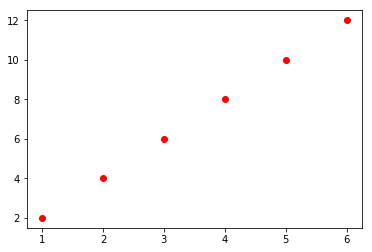

In [11]:
import matplotlib.pyplot as plt
import numpy
x=numpy.asarray([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = numpy.asarray([2.0, 4.0, 6.0, 8.0, 10.0, 12.0])
plt.plot(x,y,'ro', label='Samples data')
plt.show()

Epoch: 0050 cost= 1.233740568 W= 2.24676 b= 0.158897
Epoch: 0100 cost= 1.050302029 W= 2.19392 b= 0.450578
Epoch: 0150 cost= 0.903309584 W= 2.1078 b= 0.708395
Epoch: 0200 cost= 0.776936054 W= 2.0274 b= 0.947316
Epoch: 0250 cost= 0.668242395 W= 1.95283 b= 1.16889
Epoch: 0300 cost= 0.574755549 W= 1.88367 b= 1.37439
Epoch: 0350 cost= 0.494347423 W= 1.81953 b= 1.56496
Epoch: 0400 cost= 0.425188154 W= 1.76004 b= 1.74171
Epoch: 0450 cost= 0.365704268 W= 1.70487 b= 1.90563
Epoch: 0500 cost= 0.314542174 W= 1.65371 b= 2.05765
Epoch: 0550 cost= 0.270537496 W= 1.60626 b= 2.19863
Epoch: 0600 cost= 0.232688636 W= 1.56226 b= 2.32938
Epoch: 0650 cost= 0.200135842 W= 1.52145 b= 2.45064
Epoch: 0700 cost= 0.172137141 W= 1.4836 b= 2.5631
Epoch: 0750 cost= 0.148055062 W= 1.4485 b= 2.6674
Epoch: 0800 cost= 0.127342165 W= 1.41594 b= 2.76412
Epoch: 0850 cost= 0.109527037 W= 1.38575 b= 2.85383
Epoch: 0900 cost= 0.094204023 W= 1.35775 b= 2.93702
Epoch: 0950 cost= 0.081024855 W= 1.33178 b= 3.01418
Epoch: 1000 co

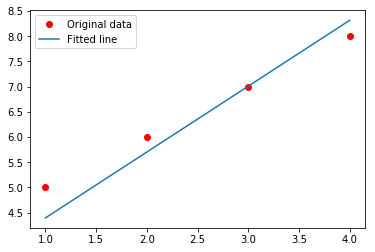

In [12]:

import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()